In [45]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from keras.preprocessing.image import load_img
import numpy as np

Input shape of training dataset:  (60000, 28, 28)
Output shape of training dataset:  (60000,)
Input shape of testing dataset:  (10000, 28, 28)
Output shape of testing dataset:  (10000,)


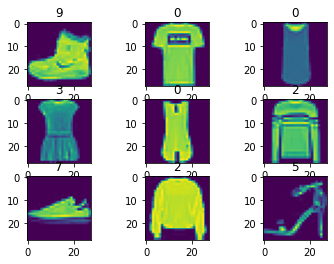

In [26]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print("Input shape of training dataset: ", trainX.shape)
print("Output shape of training dataset: ", trainy.shape)
print("Input shape of testing dataset: ", testX.shape)
print("Output shape of testing dataset: ", testy.shape)


# Display some images
for i in range(9):
  pyplot.subplot(331 + i)
  img = trainX[i]
  pyplot.imshow(img)
  pyplot.title(trainy[i])
pyplot.show()

In [29]:
def load_dataset():
  ''' Preprocess the dataset to suit the CNN Model'''
  (trainX, trainy), (testX, testy) = fashion_mnist.load_data()
  width, height, channels = trainX.shape[1], trainX.shape[2], 1
  # Reshape (Since CNN input format is (width, height, channels))
  trainX = trainX.reshape(trainX.shape[0], width, height, channels)
  testX = testX.reshape(testX.shape[0], width, height, channels)

  # Reshape outputs to suite the output of our model i.e.,
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return (trainX, trainy), (testX, testy)


def preprocess_data(X):
  ''' Applies required preprocessing techniques to the dataset'''
  X = X.astype('float32')
  # normalization
  X = X / 255.0
  return X

(60000, 10)

In [36]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(10, activation="softmax"))

  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [38]:
def run_test_harness():
  (trainX, trainy), (testX, testy) = load_dataset()
  trainX = preprocess_data(trainX)
  testX = preprocess_data(testX)
  model = define_model()
  model.fit(trainX, trainy, epochs=10, batch_size=32, verbose=1)
  model.save("final_model.h5")

run_test_harness()

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 39s 21ms/step - loss: 0.4141 - accuracy: 0.8512
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2792 - accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2413 - accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2122 - accuracy: 0.9222
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1895 - accuracy: 0.9297
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1704 - accuracy: 0.9368
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1552 - accuracy: 0.9423
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1384 - accuracy: 0.9490
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1271 - accuracy: 0.9531
Epoch 10/10
1875/1875 [==============================] - 44s 23ms/step - lo

In [43]:
def run_test_harness():
  (trainX, trainy), (testX, testy) = load_dataset()
  testX = preprocess_data(testX)
  model = load_model("final_model.h5")
  _, acc = model.evaluate(testX, testy)
  print("Accuracy of the model is %.3f" %(acc*100))

run_test_harness()

313/313 [==============================] - 3s 8ms/step - loss: 0.2797 - accuracy: 0.9130
Accuracy of the model is 91.300


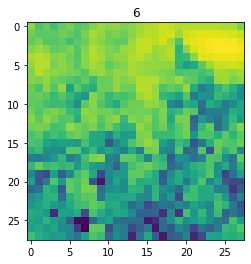

In [53]:
def load_image(filename):
  img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img/255.0
  return img

def run_example():
  img = load_image("/content/drive/MyDrive/images/Flowers.jpg")
  model = load_model("final_model.h5")
  result = np.argmax(model.predict(img), axis=-1)
  pyplot.imshow(img.reshape(28, 28))
  pyplot.title(result[0])
  pyplot.show()

run_example()